In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from fastai import *
from fastai.text import *
import os

/kaggle/input/nirmala/Nirmala.ttf
/kaggle/input/hindi-oscar-corpus/hi_dedup_1000.txt
/kaggle/input/hindi-oscar-corpus/hi_dedup.txt
/kaggle/input/hindi-stopwords/Hindi_STOPWORDS.txt


In [2]:
print(os.listdir('/kaggle/input/hindi-oscar-corpus'))

['hi_dedup_1000.txt', 'hi_dedup.txt']


In [3]:
path = '/kaggle/input/hindi-oscar-corpus'
# file = 'sample_naaraz_22.txt'; file = Path(file)
# filename = path/file
# f = open(filename, 'r')
# text = f.read()
# print(text)

text = ''
for file in os.listdir(path)[1:2]:
    filename = path + '/' + file
    print(filename)
    f = open(filename, 'r')
    t = f.read(50000000)
    text += t

/kaggle/input/hindi-oscar-corpus/hi_dedup.txt


In [4]:
print(text[:500])

शारदा पारा के मिलन चैiक से आज महापौर देवेन्द्र यादव, पार्षद छोटे लाल चैधरी के साथ वार्ड का भ्रमण करते हुए वार्ड की पेयजल, स्वच्छता सफाई, विकास कार्यों का निरीक्षण किया।
सूचना का अधिकार - विभाग द्वारा तैयार 17 column सम्बंधित पंजी ,कार्यालय नगर पालिक निगम भिलाई जोन-06 रिसाली
आज सम्पत्तिकर अधिकारी एच.के. चन्द्राकर ने महाप्रबंधक भारत संचार निगम लिमिटेड दुर्ग को सम्पत्तिकर की राशि कुर्कीवारण्ट जारी कर दिया, कुर्कीवारण्ट के साथ अधिभार सहित राशि वसुल किये जाने की नोटिस तामिल की गई है।
राष्ट्रपति, राज्


In [5]:
# import matplotlib as mtp

# mtp.rcParams['figure.dpi'] = 640

In [6]:
with open("/kaggle/input/hindi-stopwords/Hindi_STOPWORDS.txt",encoding='utf-8') as f:
    stopword= f.read().strip('\ufeff')
stopword = stopword.split(", ")
stopword = [i.strip("'") for i in stopword]
print(stopword)
stopwords = set(stopword)

['अर्थात', 'कुछ', 'तेरी', 'साबुत', 'अपनि', 'हूं', 'काफि', 'यिह', 'जा', 'दे', 'देकर', 'रह', 'कह', 'कहा', "बात' ", 'जिन्हों', 'किर', 'कोई', 'हे', 'कोन', 'रहा', 'सब', 'सो', 'तक', 'इंहें', 'इसकि', 'अपनी', 'दबारा', 'सभि', 'होते', 'भीतर', 'निचे', 'घर', 'उन्हें', 'उन्ह', 'मेरे', 'था', 'व', 'इसमें', 'उसी', 'बिलकुल', 'होति', 'गया', 'सकता', 'अपना', 'लिये', 'उसका', 'पर', 'दवारा', 'गए', 'है', 'कितना', 'भि', 'लिए', 'वुह ', 'ना', 'किसि', 'परन्तु', 'किन्हें', 'बहुत', 'भी', 'तुम्हारे', 'निहायत', 'उन्हीं', 'वहिं', 'हैं', 'उन्हों', "इतयादि' ,'यहाँ", 'तब', 'पूरा', 'क्योंकि', 'कौनसा', 'आप', 'हुअ', 'ऐसे', 'एस', 'कारण', 'अप', 'पहले', 'तुम', 'जेसा', 'तिस', 'लेकिन', 'कहते', 'मगर', 'करता', 'संग', 'सभी', 'जीधर', 'किंहों', 'हि', 'द्वारा', 'हुआ', 'तू', 'जिंहें', 'उसने', 'पास', 'वहां', 'वह', 'किंहें', 'इंहों', 'मुझ', 'कुल', 'तिंहों', 'का', 'मेरी', 'तेरे', 'उनके', 'क्या', 'जहाँ', 'काफ़ी', 'वर्ग', 'वरग', 'बही', 'ये', 'जिस', 'इसि', 'हुई', 'साम्हने', 'नहिं', 'जैसे', 'वहीं', 'दिया', 'अभी', 'यहि', 'वग़ैरह', 'उनकि', 'न', '

In [7]:
import re
def preprocess_tokenize(text):
      # for removing punctuation from sentencesc
    text = str(text)
    text = re.sub(r'(\d+)', r'', text)
    
    text = text.replace('/', '')
    text = text.replace('-', '')
    
    text = text.replace('\n', '')
    text = text.replace('\r', '')
    text = text.replace('\t', '')
    text = text.replace('\u200d', '')
    text=re.sub("(__+)", ' ', str(text)).lower()   #remove _ if it occors more than one time consecutively
    text=re.sub("(--+)", ' ', str(text)).lower()   #remove - if it occors more than one time consecutively
    text=re.sub("(~~+)", ' ', str(text)).lower()   #remove ~ if it occors more than one time consecutively
    text=re.sub("(\+\++)", ' ', str(text)).lower()   #remove + if it occors more than one time consecutively
    text=re.sub("(\.\.+)", ' ', str(text)).lower()   #remove . if it occors more than one time consecutively
        
    text=re.sub(r"[<>()|।&©@#ø\[\]\'’‘\"`,;:?.~*!]", ' ', str(text)).lower() #remove <>()|&©ø"',;?~*!
    text = re.sub("([a-zA-Z])",' ',str(text)).lower()
    text = re.sub("(\s+)",' ',str(text)).lower()
    #text = text.split(' ')
    #text = [x for x in text if(x!='')]
    #text.insert(0,'<sos>')
    #text.insert(len(text),'<eos>')
    return text

In [8]:
import pandas as pd
import torch
import random
import numpy as np

In [9]:
text = preprocess_tokenize(text) #poems

In [10]:
print(text[:5000])

शारदा पारा के मिलन चै क से आज महापौर देवेन्द्र यादव पार्षद छोटे लाल चैधरी के साथ वार्ड का भ्रमण करते हुए वार्ड की पेयजल स्वच्छता सफाई विकास कार्यों का निरीक्षण किया सूचना का अधिकार विभाग द्वारा तैयार सम्बंधित पंजी कार्यालय नगर पालिक निगम भिलाई जोन रिसालीआज सम्पत्तिकर अधिकारी एच के चन्द्राकर ने महाप्रबंधक भारत संचार निगम लिमिटेड दुर्ग को सम्पत्तिकर की राशि कुर्कीवारण्ट जारी कर दिया कुर्कीवारण्ट के साथ अधिभार सहित राशि वसुल किये जाने की नोटिस तामिल की गई है राष्ट्रपति राज्यपाल मुख्यमंत्री जैसे संवैधानिक पदों पर आज महिलाएं देश के विकास के लिए निर्णय ले रहीं है परसा कोल ब्लॉक जनसुनवाई में अडानी द्वारा धनबल का दुरुपयोग कम्पनी की रिपोर्ट फ़र्ज़ी भृमात्मक और झूटी – छत्तीसगढ़ बॉस्केटपरसा कोल ब्लॉक जनसुनवाई में अडानी द्वारा धनबल का दुरुपयोग कम्पनी की रिपोर्ट फ़र्ज़ी भृमात्मक और झूटीपर्यावरण एक ऐसा विषय हैं जिसका प्रभाव आने वाली पीढ़ियों पर भी पड़ता हैं परन्तु खनन और उधोगिकरण कि अंधी दौड़ में नियमो और कानूनों का पालन करवाने वाला प्रशासनिक तंत्र स्वयं विधि विरुद्ध तरीके से कार्य करते हुए कंपनियों के साथ 

In [11]:
from string import punctuation
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

stopwords = set(stopword)

tokens = word_tokenize(text)
customStopWords = set(list(stopwords) + list(punctuation+'।'+'॥'))
wordsWOstopwords = [word for word in tokens if word not in customStopWords]
#removing numeric digits from list of words
wordsWOstopwords = [i for i in wordsWOstopwords if not i.isdigit()]
# freq = FreqDist(wordsWOstopwords)

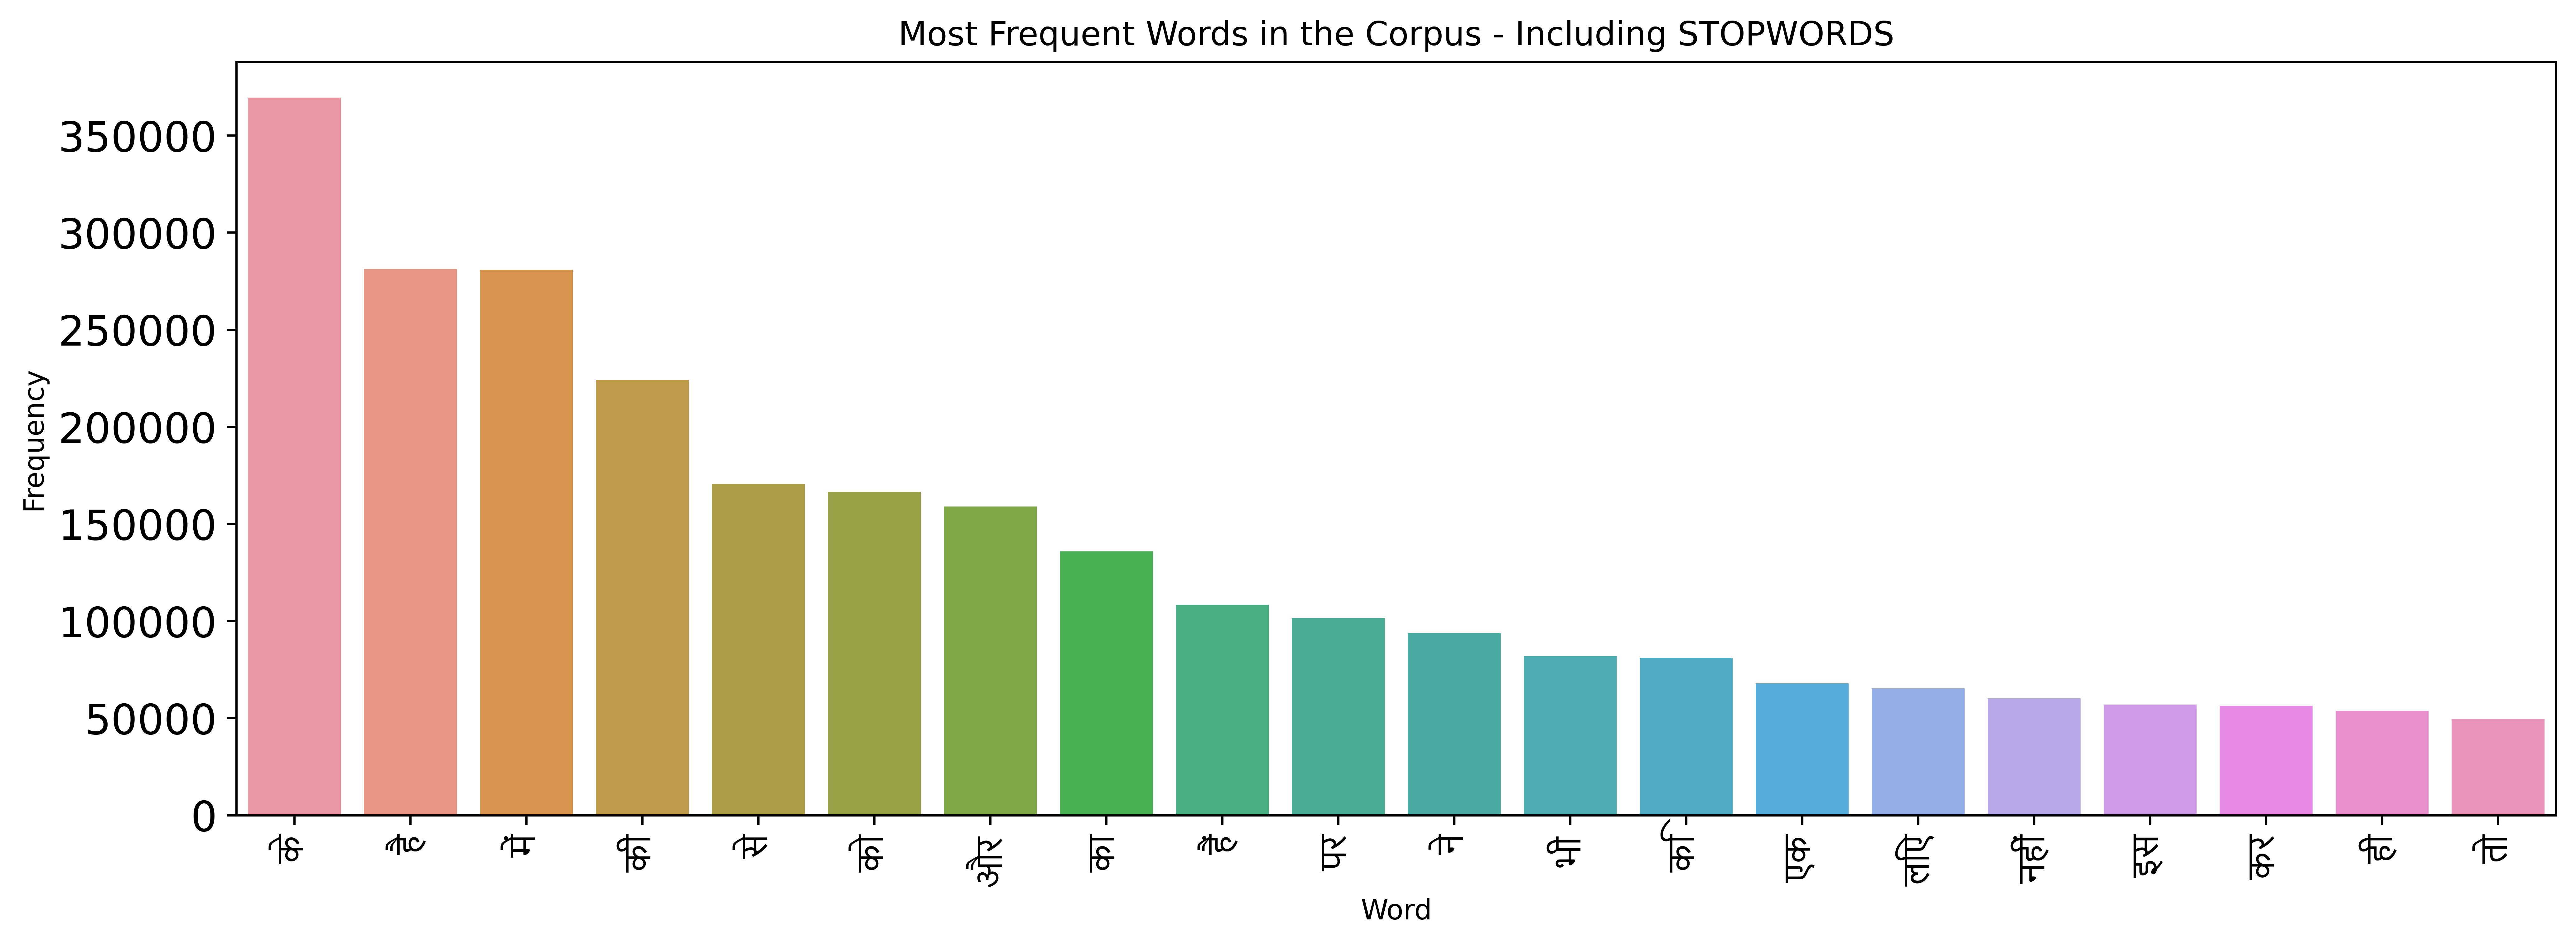

In [12]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns

hindi_font = FontProperties(fname = "../input/nirmala/Nirmala.ttf")

title = "Most Frequent Words in the Corpus - Including STOPWORDS"
# plot_word_frequency(corpus, title, 20)
word_freq = FreqDist(tokens)
labels = [element[0] for element in word_freq.most_common(20)]
counts = [element[1] for element in word_freq.most_common(20)]
plt.figure(figsize=(15,5), dpi=640)
plt.xticks(color="black", fontproperties=hindi_font, rotation=90, fontsize = 12)
plt.yticks(fontsize = 15)
plt.title(title)
plt.ylabel("Frequency")
plt.xlabel("Word")
plot = sns.barplot(labels,counts)

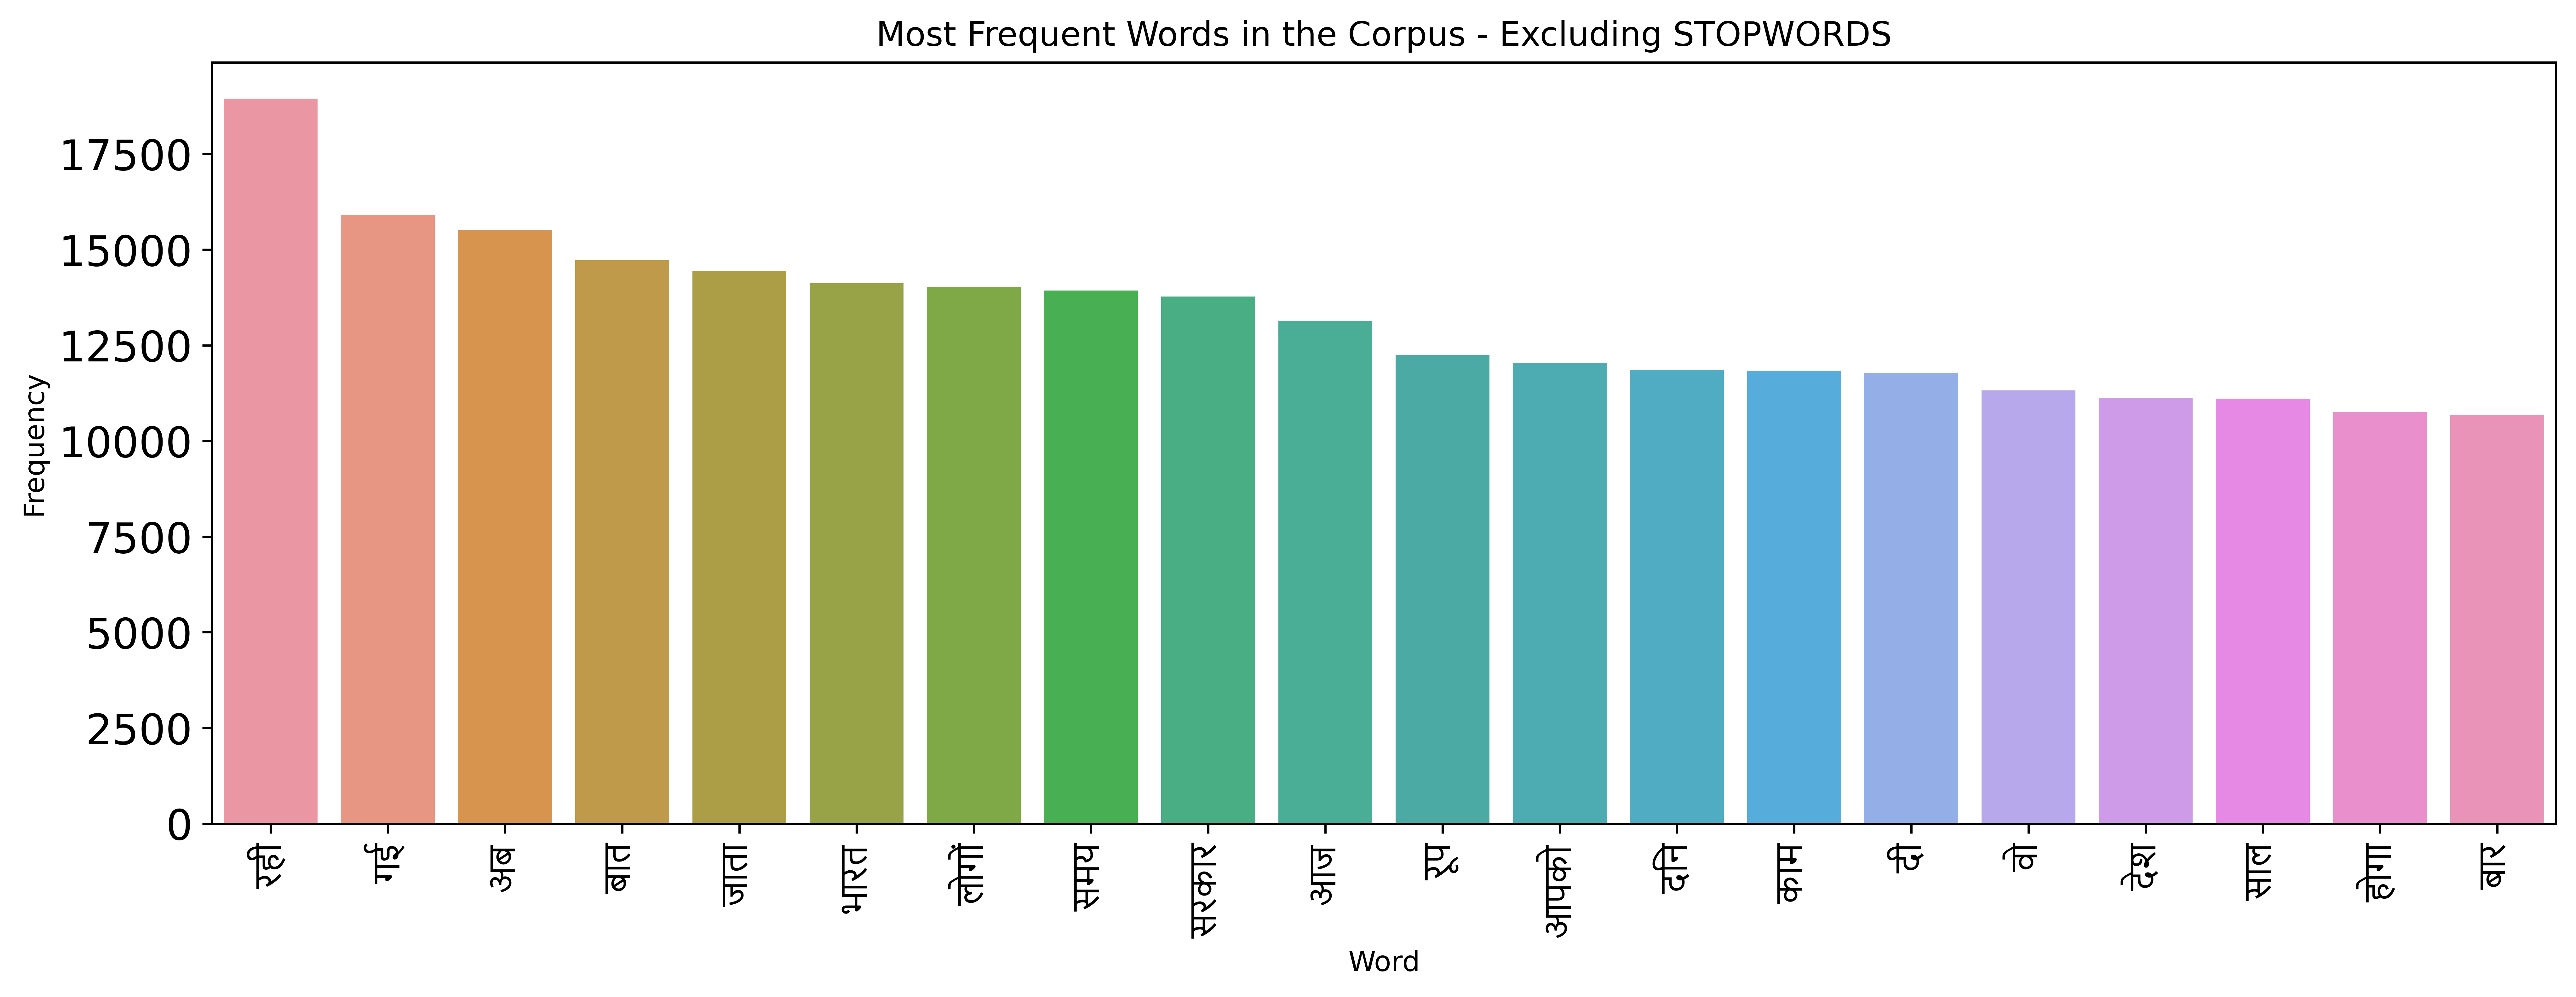

In [13]:
corpus = wordsWOstopwords

title = "Most Frequent Words in the Corpus - Excluding STOPWORDS"
# plot_word_frequency(corpus, title, 20)
word_freq = FreqDist(corpus)
labels = [element[0] for element in word_freq.most_common(20)]
counts = [element[1] for element in word_freq.most_common(20)]
plt.figure(figsize=(15,5), dpi=640)
plt.xticks(color="black", fontproperties=hindi_font, rotation=90, fontsize = 12)
plt.yticks(fontsize = 15)
plt.title(title)
plt.ylabel("Frequency")
plt.xlabel("Word")
plot = sns.barplot(labels,counts)

In [14]:
print(len(tokens), len(wordsWOstopwords))

9387763 5226445


In [15]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

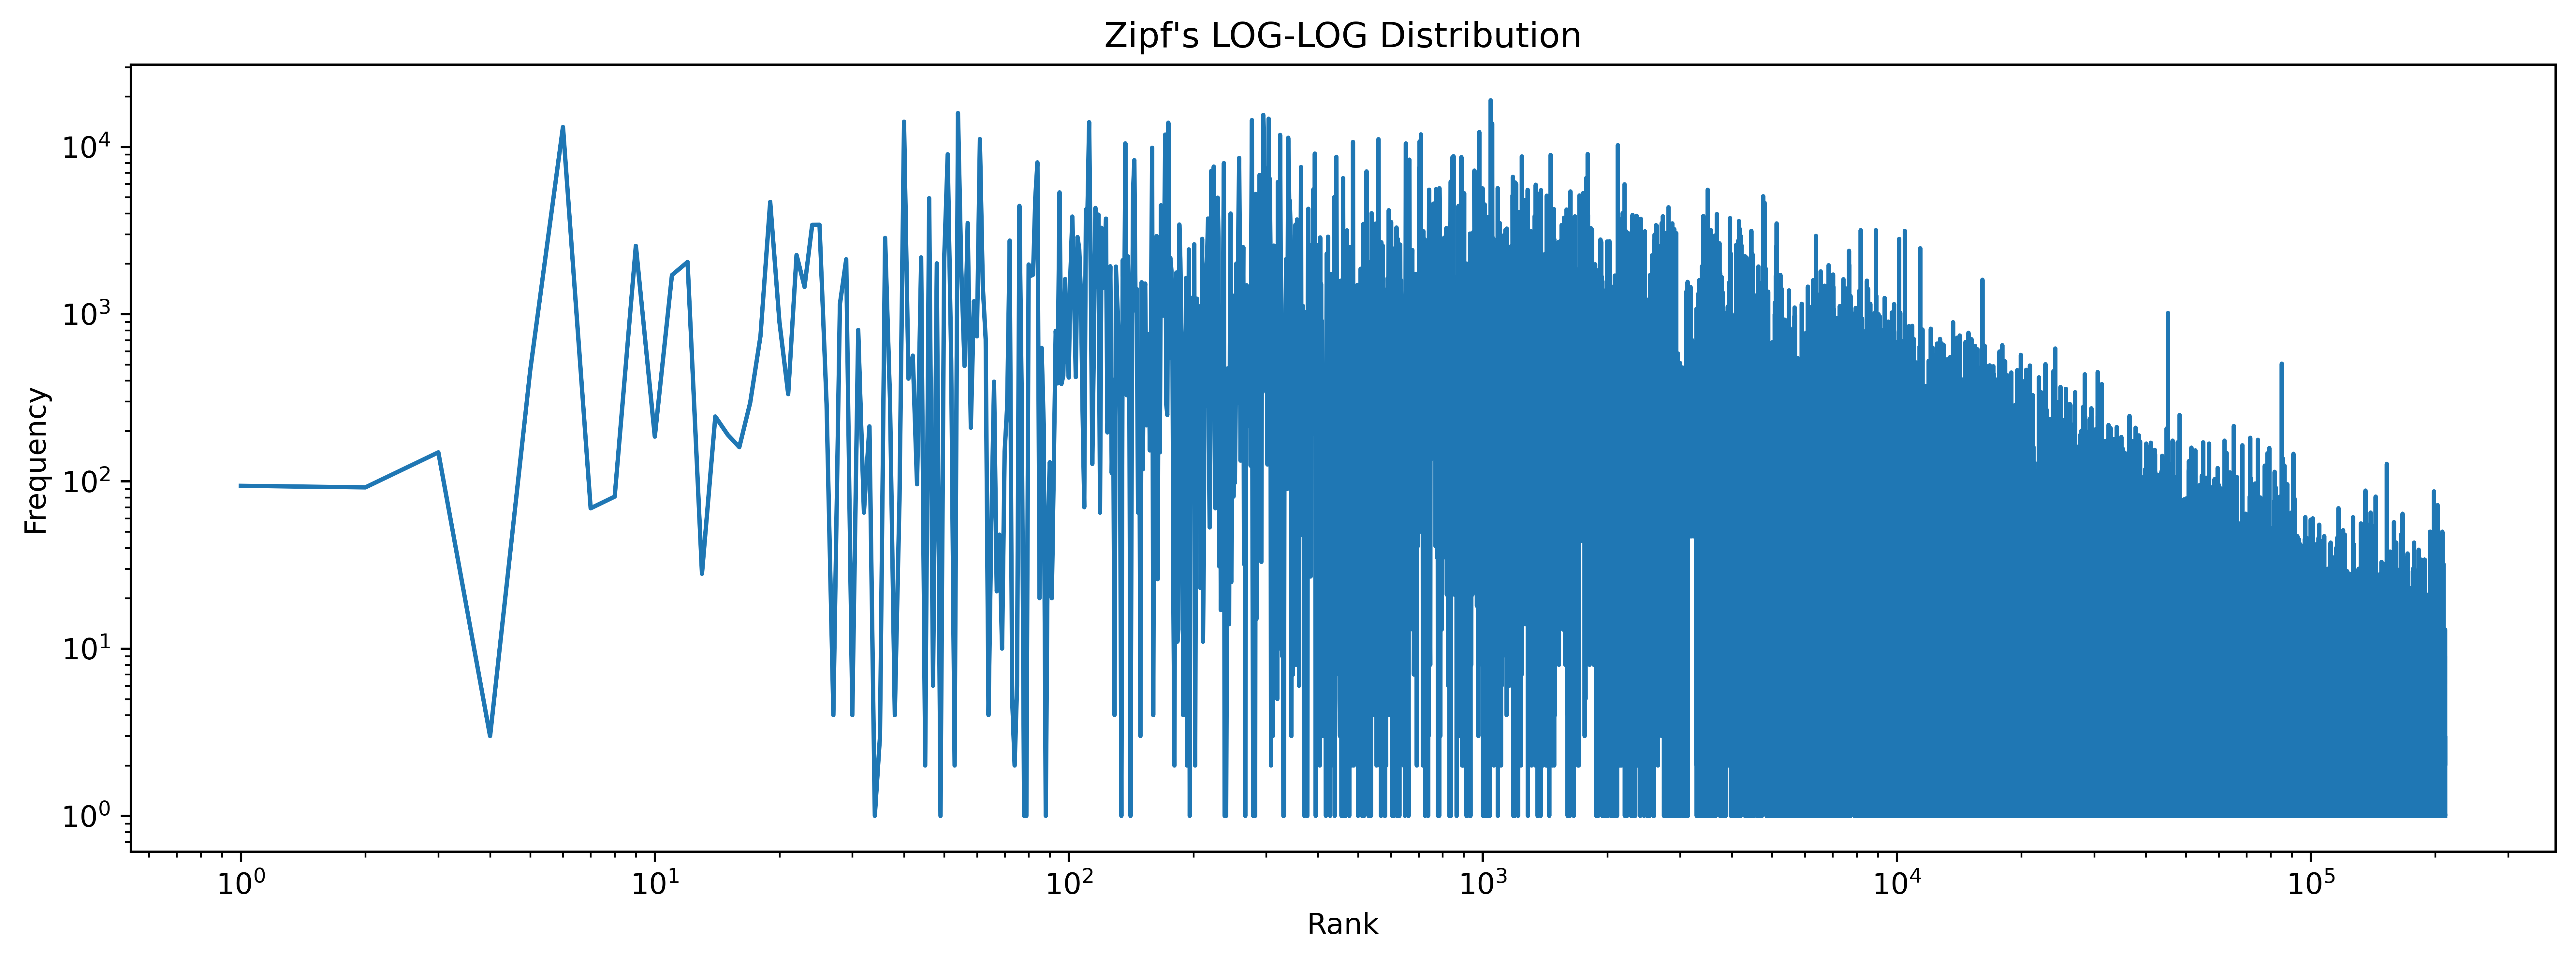

In [16]:
fd=FreqDist()
    
#Creating ranks and frequencies
ranks = []
freqs = []
for i in corpus:
    fd[i] +=1
for rank,word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])
        
#Plotting the LOG-LOG distribution
plt.figure(figsize=(15,5), dpi=640)
plt.loglog(ranks,freqs)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's LOG-LOG Distribution")
plt.show()

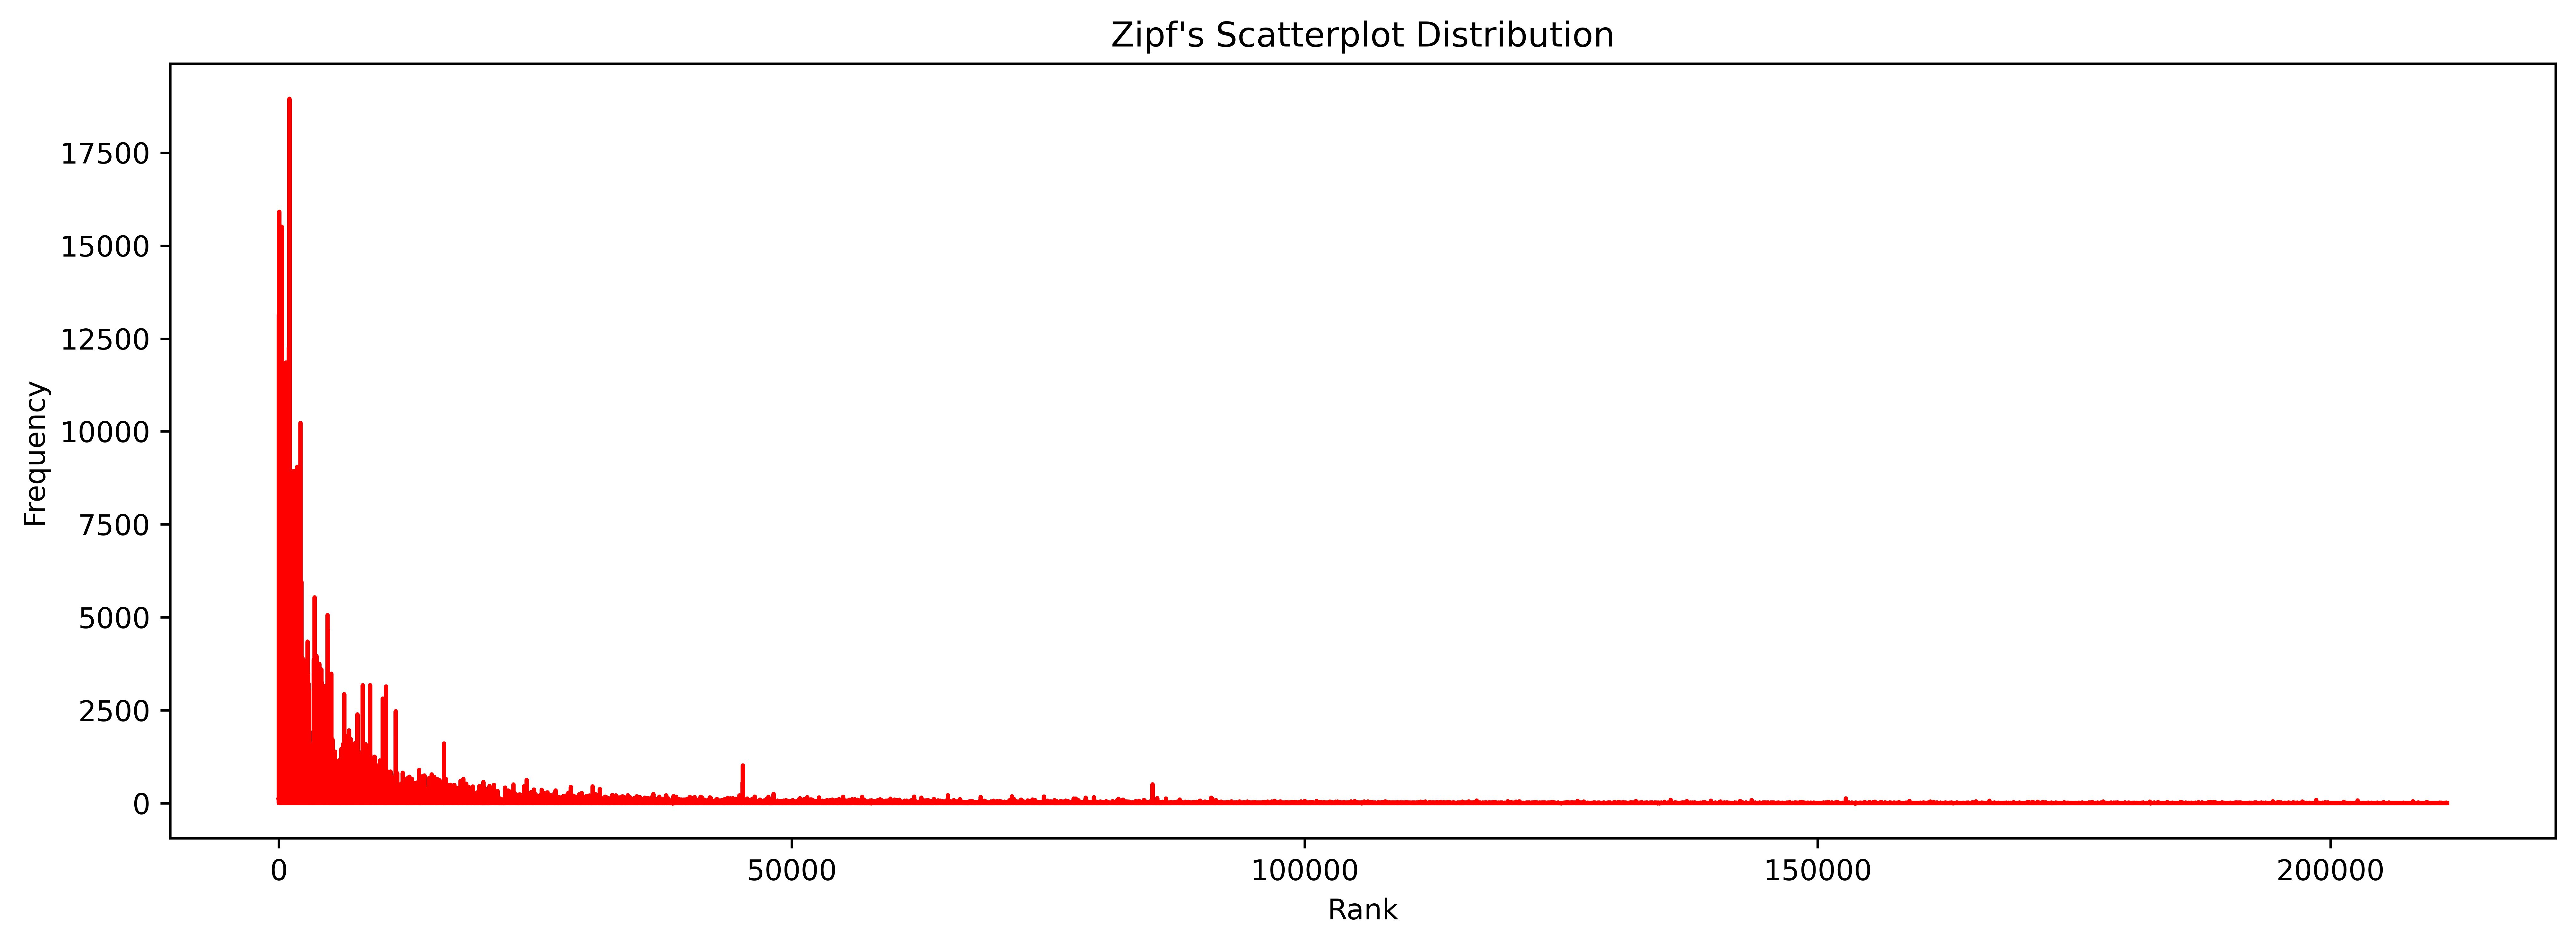

In [17]:
#Plotting the Scatterplot distribution
plt.figure(figsize=(15,5), dpi=640)
plt.plot(ranks, freqs, color='red')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Scatterplot Distribution")
plt.show()


Heaps Law


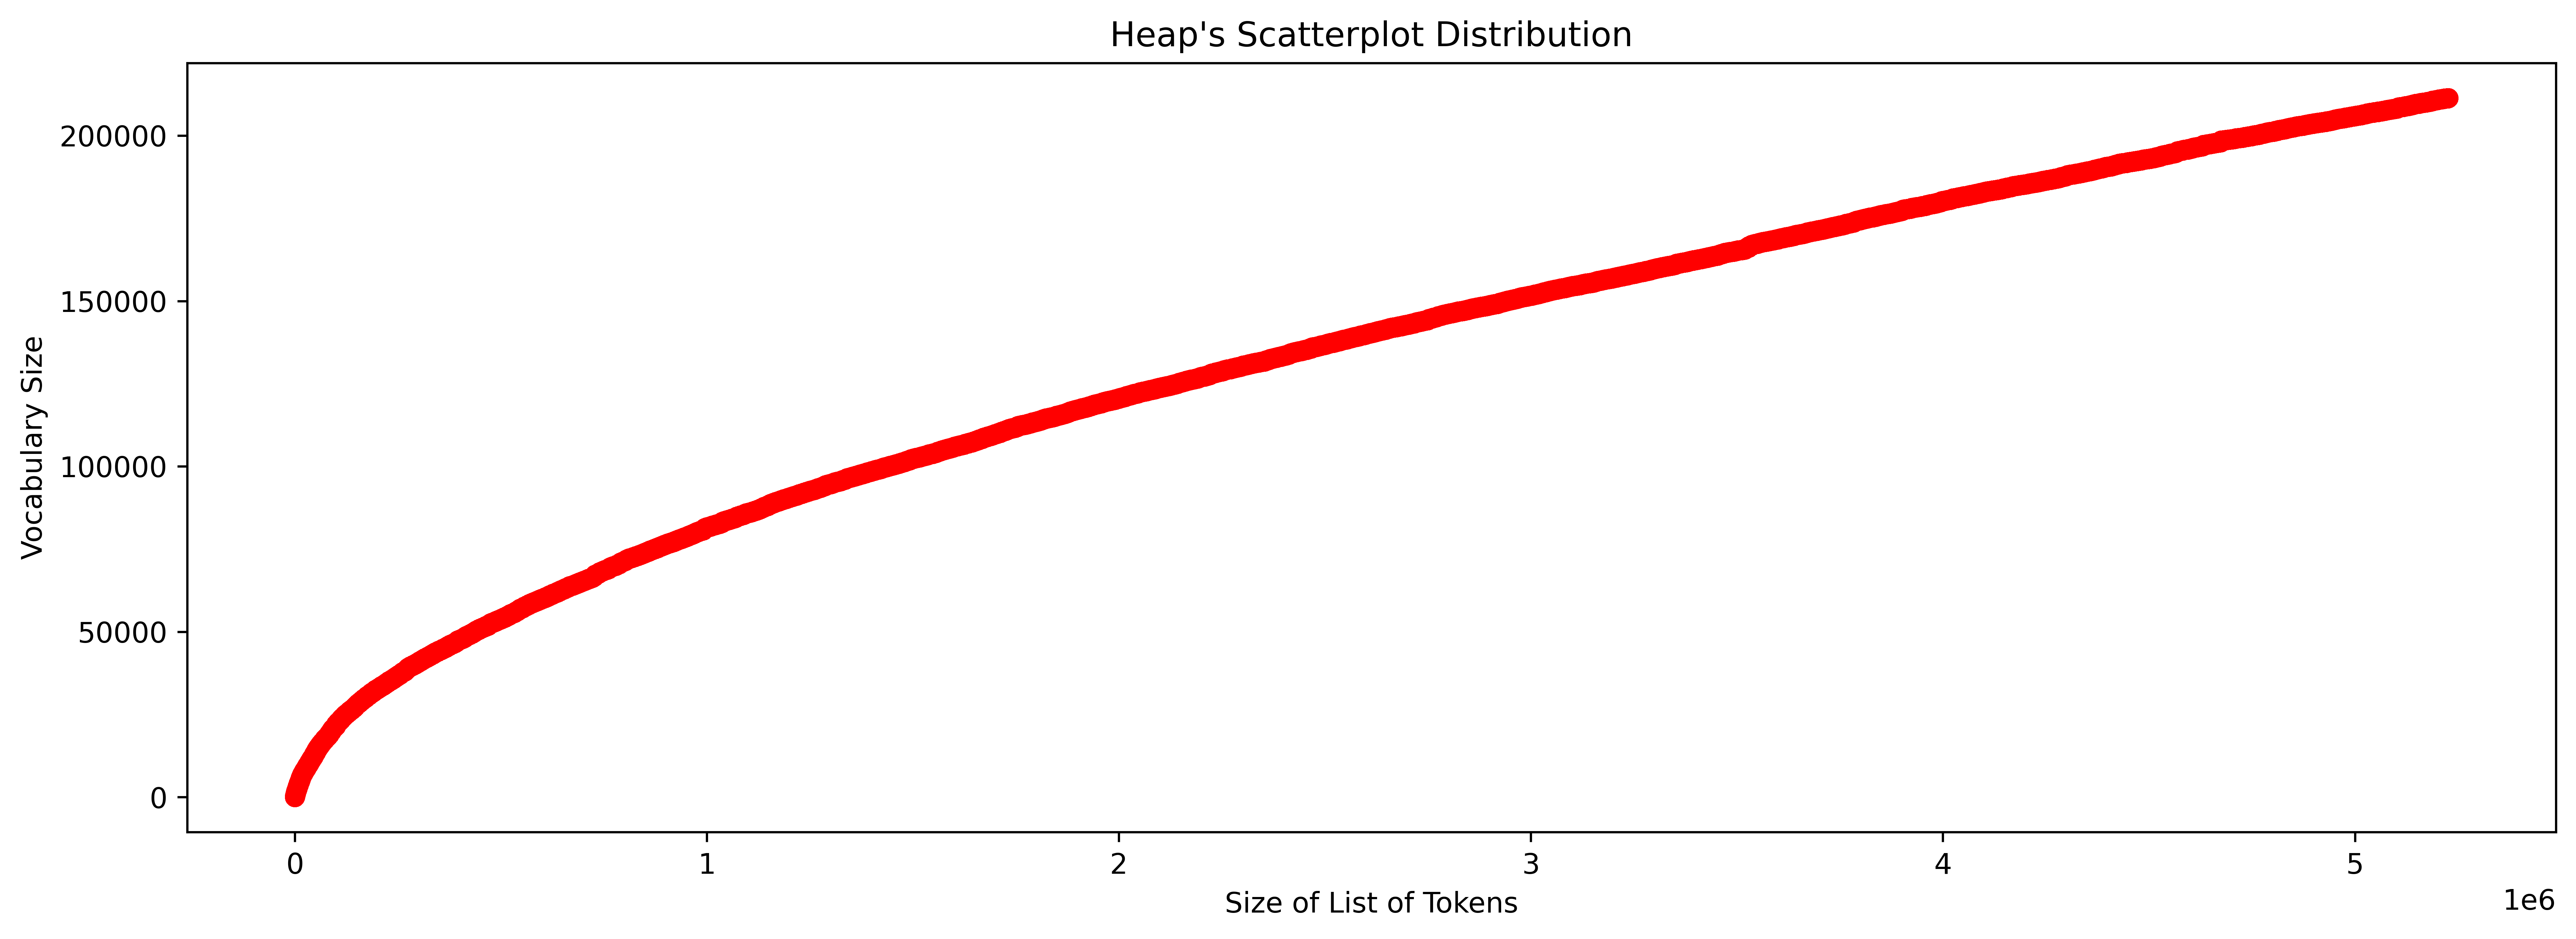

In [18]:
'''Heaps Law'''
    
print("Heaps Law")
    
uniq = set()
    
Tn = []
V = []
    
for i, token in enumerate(corpus):
    uniq.add(token)
    Tn.append(i)   #Tn: Tokens
    V.append(len(uniq))   #Vocab
    #print(i, len(uniq))
        
#Plotting the Scatterplot distribution for Heap's Law
plt.figure(figsize=(15,5), dpi=640)
plt.scatter(Tn,V, color='red')
plt.xlabel('Size of List of Tokens')
plt.ylabel('Vocabulary Size')
plt.title("Heap's Scatterplot Distribution")
plt.show()

# **CURVE FITTING**

1. **HEAPS LAW**

In [19]:
from scipy.optimize import curve_fit
import math

def heaps(T, k, b):
    return k*np.power(T,b)

# Fit the HEAPS Curve
pars, cov = curve_fit(f=heaps, xdata=Tn, ydata=V, p0=[0, 0], bounds=(-np.inf, np.inf))

# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))
# Calculate the residuals
res = V - heaps(Tn, *pars)

print(*pars, stdevs)

26.746060347334215 0.5798640853003677 [1.83116194e-03 4.56024893e-06]


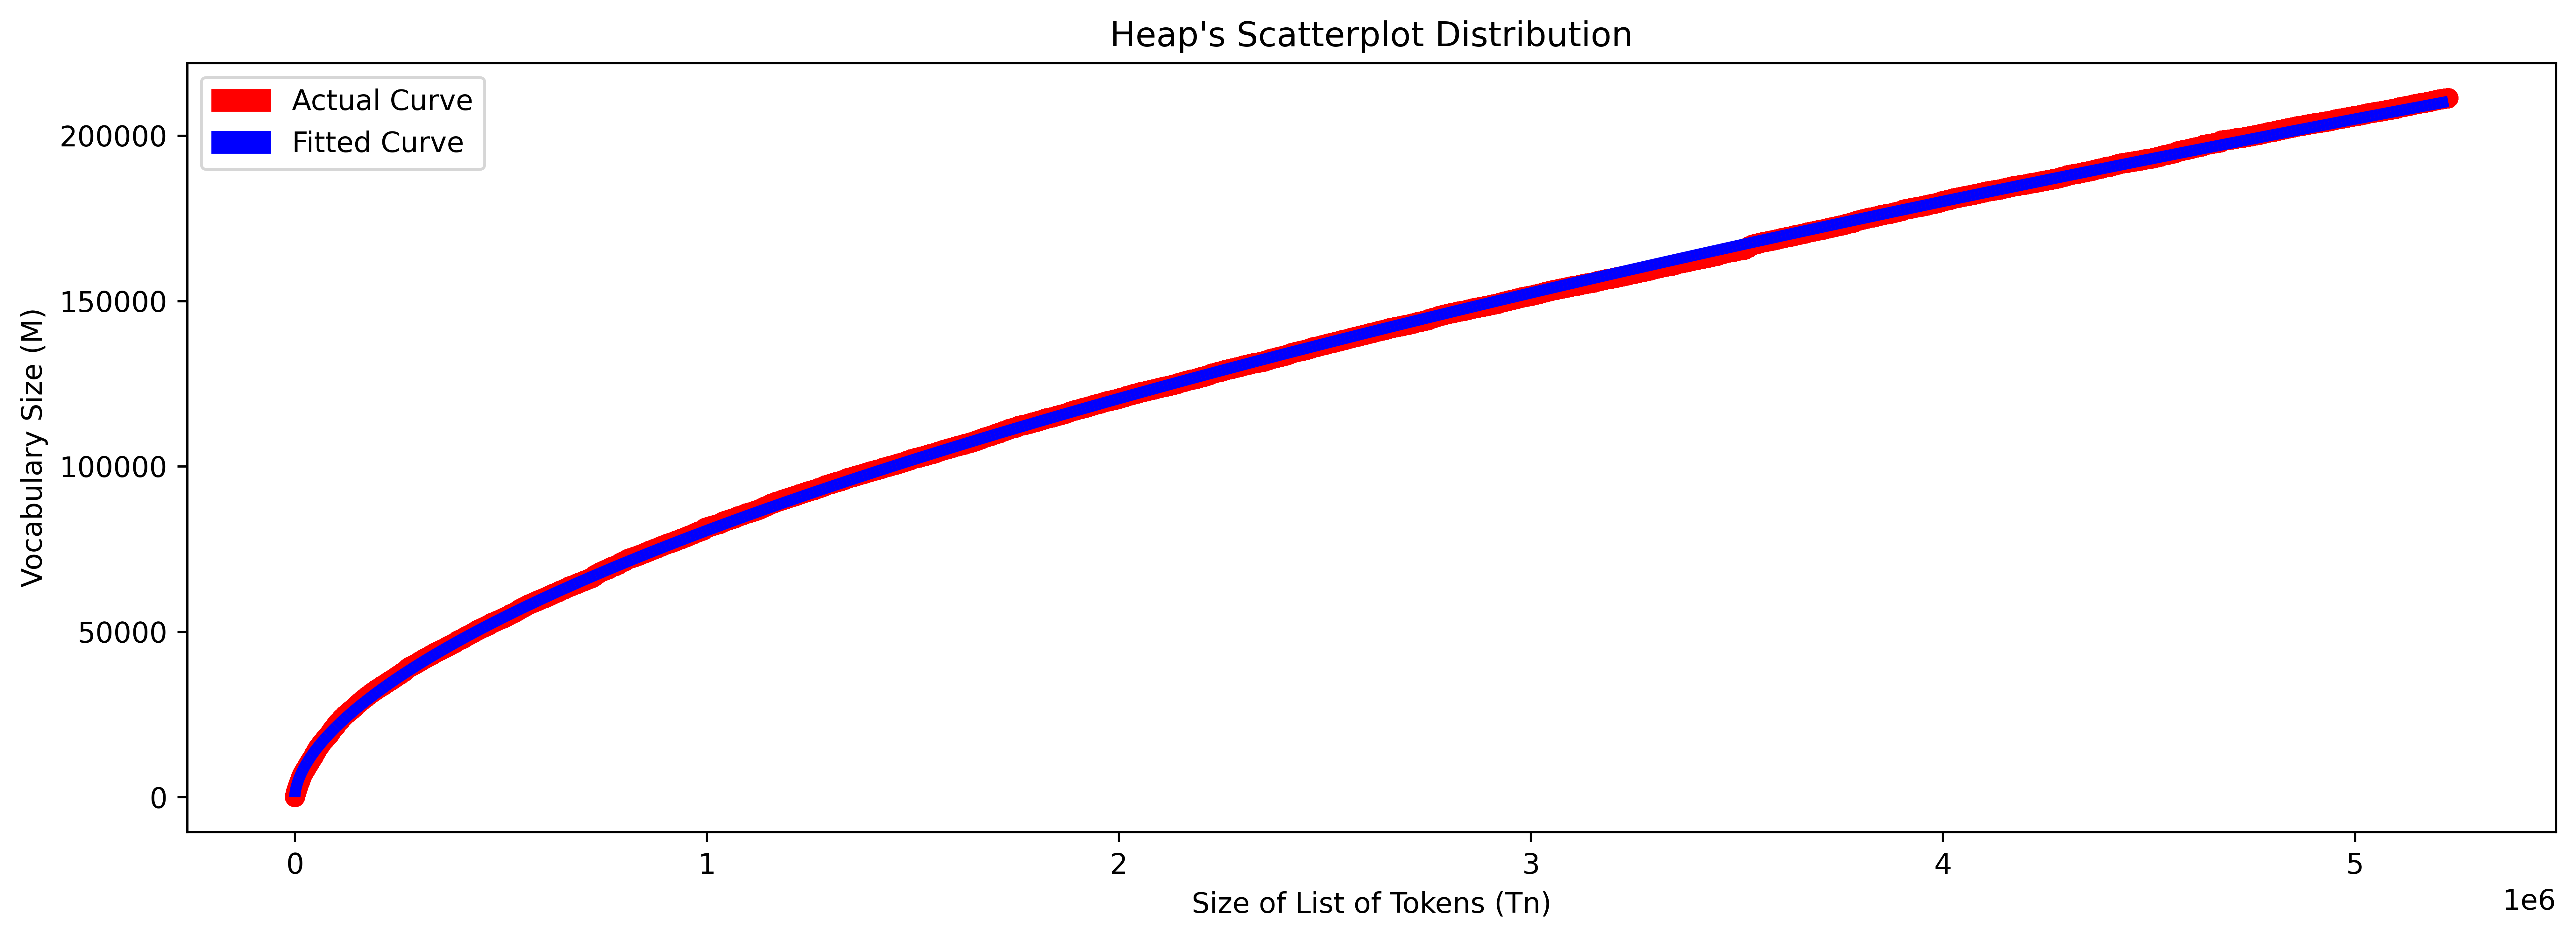

In [20]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(15,5), dpi=640)
ax = fig.add_subplot(111)
red_patch = mpatches.Patch(color='r', label='Actual Curve')
blue_patch = mpatches.Patch(color='blue', label='Fitted Curve')
plt.scatter(Tn,V, color='red')
plt.xlabel('Size of List of Tokens (Tn)')
plt.ylabel('Vocabulary Size (M)')
plt.title("Heap's Scatterplot Distribution")
plt.legend(handles=[red_patch,blue_patch])
ax.plot(Tn, heaps(Tn, *pars), linestyle='--', linewidth=4, color='blue')
plt.show()

2. **ZIPF-MANDELBROT**

In [21]:
def z(r, k, a):
    return np.divide(k,np.power(np.add(r,2.7),a))

# Fit the HEAPS Curve
pars, cov = curve_fit(f=z, xdata=ranks, ydata=freqs, p0=[0, 1], bounds=(-np.inf, np.inf))

# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))
# Calculate the residuals
res = freqs - z(ranks, *pars)

print(*pars, stdevs)

14866.789503745227 0.5232404747220754 [1.64655711e+02 1.58172618e-03]


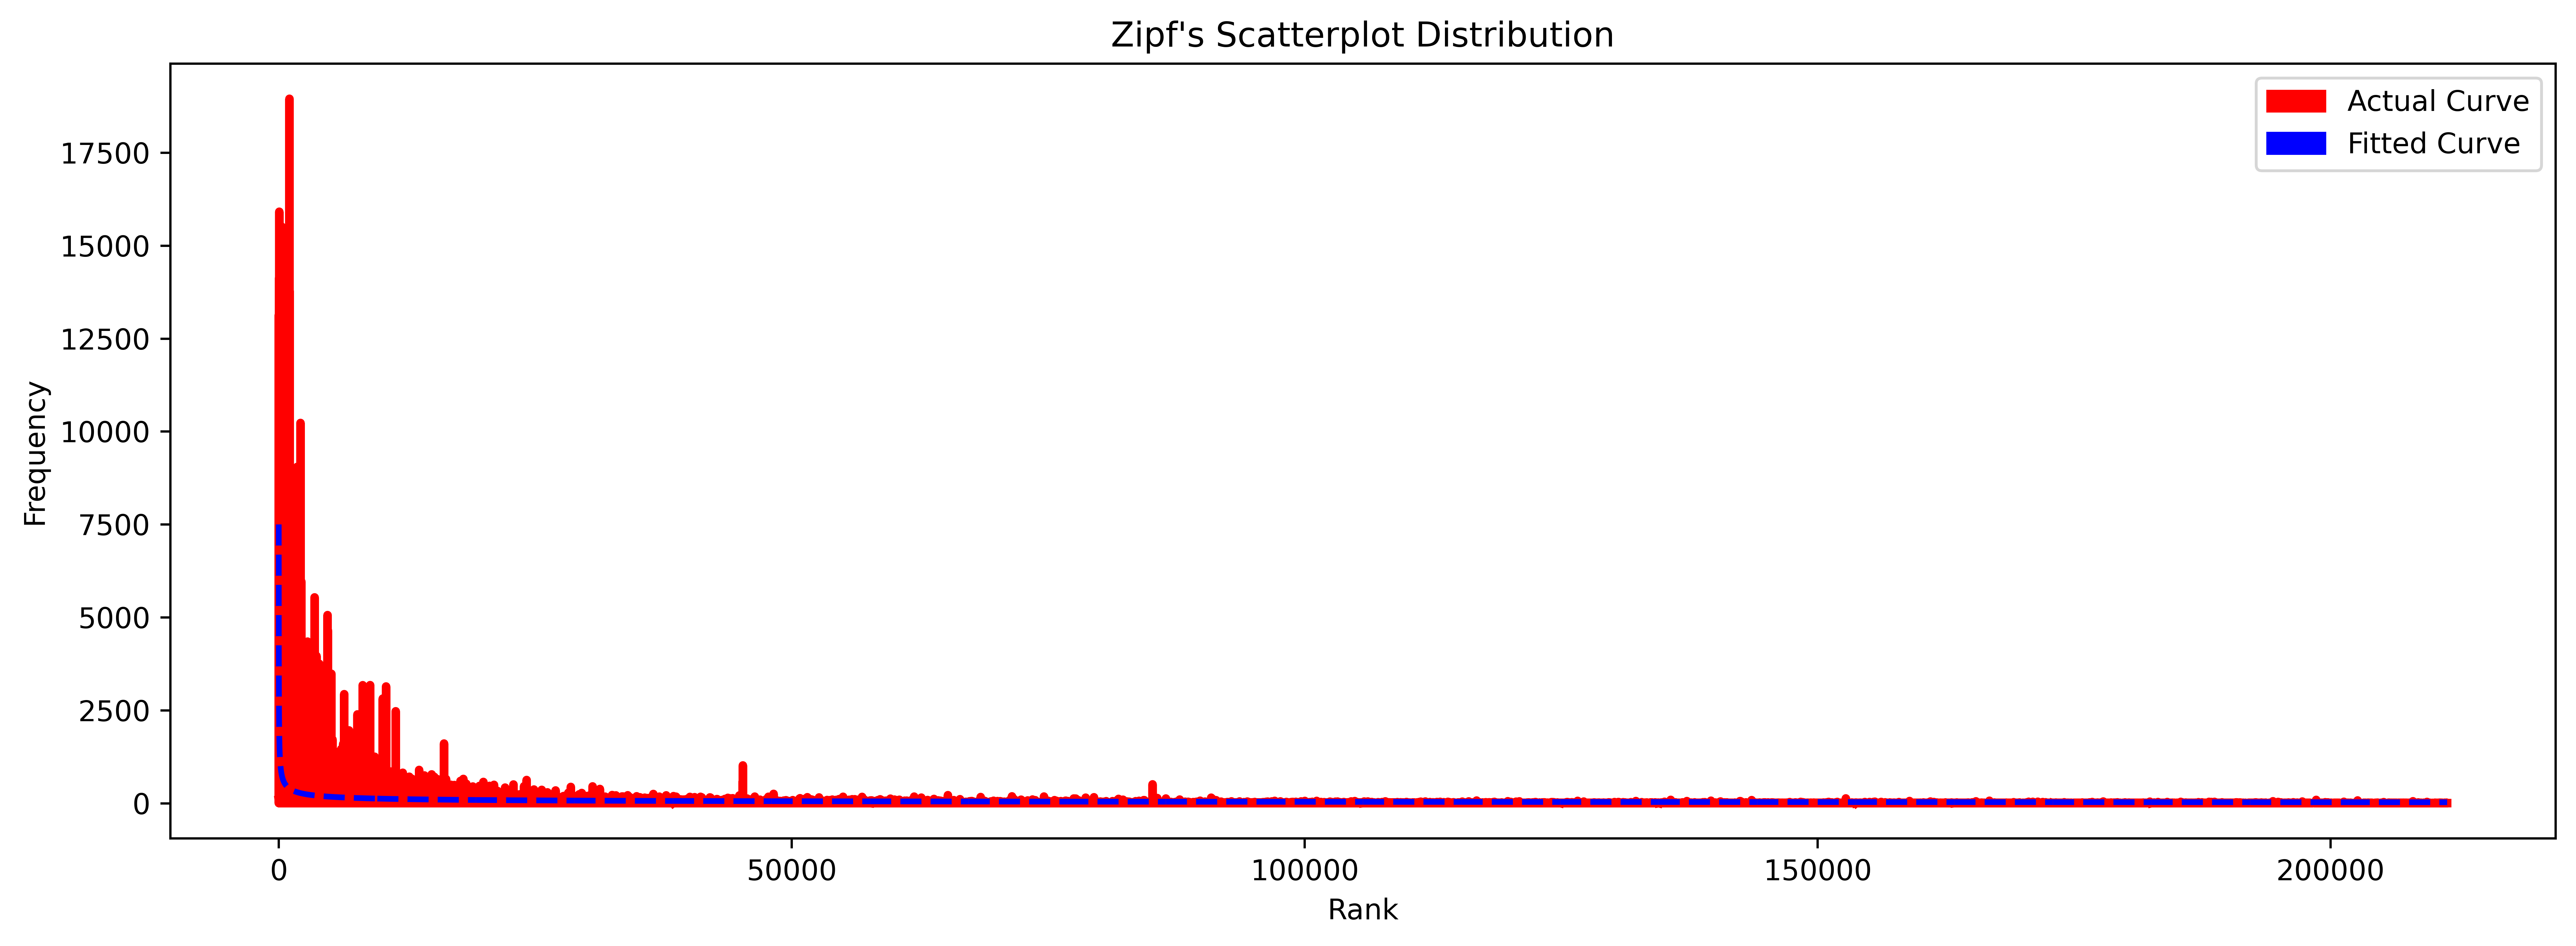

In [22]:
#Plotting the Scatterplot distribution
fig = plt.figure(figsize=(15,5), dpi=640)
# plt.axis([0, max(ranks), 0, max(freqs)])
ax = fig.add_subplot(111)
red_patch = mpatches.Patch(color='r', label='Actual Curve')
blue_patch = mpatches.Patch(color='blue', label='Fitted Curve')
plt.plot(ranks,freqs, color='red', linewidth=3)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Zipf's Scatterplot Distribution")
plt.legend(handles=[red_patch,blue_patch])
ax.plot(ranks, z(ranks, *pars), linestyle='--', linewidth=2, color='blue')
# plt.ylim((0, max(freqs) + 500))
plt.show()